# Differenzenquotienten

In [7]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy

Die Grundidee bei den Differenzenquotienten ist die Annäherung der abzuleitenden Funktion mit einer Taylor-Entwicklung an mehreren Stellen. Damit kann nach der gesuchte Ableitung an der entsprechenden Entwicklungsstelle aufgelöst werden.  

## Taylor-Entwicklung

Mittels der [Taylor-Entwicklung](https://de.wikipedia.org/wiki/Taylorreihe) kann jede beliebig oft stetig differenzierbare Funktion $\sf f(x)$ um einem Entwicklungspunkt $\sf x_0$ beliebig genau angenähert werden. Die funktionale Abhängigkeit bezieht sich nun auf die Variable $\sf h$, welche nur in direkter Umgebung um $\sf x_0$ betrachtet wird. Die Taylor-Entwicklung lautet:

$$ \sf f(x_0 + h) = \sum_{i=0}^{\infty}\frac{1}{i!}f^{(i)}(x_0)\cdot h^i $$
$$ \sf = f(x_0) + f'(x_0)\cdot h + \frac{1}{2} f''(x_0)\cdot h^2 + \frac{1}{6}f'''(x_0)\cdot h^3 + \cdots $$

Diese Entwicklung kann auch nur bis zu einer vorgegebenen Ordnung betrachtet werden. So nimmt die Entwicklung bis zur Ordnung $\sf \mathcal{O}(h^3)$ folgende Form an:

$$\sf f(x_0 + h) = f(x_0) + f'(x_0)\cdot h + \frac{1}{2} f''(x_0)\cdot h^2 + \mathcal{O}(h^3) $$


Hierbei deutet das Landau-Symbol $\sf \mathcal{O}$ die Ordnung an, welche die vernachlässigten Therme, hier ab $\sf h^3$, als Approximationsfehler zusammenfasst. Die Ordnung gibt an wie schnell bzw. mit welchem funktionalem Zusammenhang der Approximationsfehler gegen Null läuft für $\sf h \rightarrow 0$.

## Differenzenformeln

Die einfachste Differenzenformel ergibt sich aus der Taylor-Reihe bis $\sf \mathcal{O}(h^2)$. Hier kann die Reihe direkt nach der gesuchten Ableitung an der Stelle $\sf x_0$ umgeformt werden. 

$$\sf f(x_0 + h) = f(x_0) + f'(x_0)h + \mathcal{O}(h^2) $$
$$\sf \Rightarrow \quad f'(x_0) = \frac{f(x_0 + h) - f(x_0)}{h} + \mathcal{O}(h) $$

Dies ist die vorwärtsgerichtete Differenzformel erster Ordnung für die erste Ableitung. Erste Ordnung bedeutet hierbei, dass im Grenzwert $\sf h\rightarrow 0$ der Approximationsfehler linear mit der Schrittweite abnimmt.

Nach dieser Formel muss die abzuleitende Funktion an zwei Stellen $\sf f(x_0)$ und $\sf f(x_0+h)$ ausgewertet werden, um die Ableitung numerisch zu bestimmen. Im Grenzwert für eine beliebig kleine Schrittweite, d.h. $\sf h \rightarrow 0$, nähert sich dieser Quotient der exakten Ableitung an der Stelle $\sf x_0$ an.

Das folgende Beispiel demonstriert die Näherung anhand der Funktion

$$ \sf f(x) = \sin(3x) + 2x $$

In [43]:
def fkt(x):
    return np.sin(3*x) + 2*x

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x)

# Exakte Lösung bei x=1
fp_exakt = 3*np.cos(3*0.75) + 2

In [17]:
# Entwicklungspunkt und Schrittweite
h = 0.25
x0 = 0.75

# Auswertung an den beiden Stellen
f0 = fkt(x0)
fh = fkt(x0 + h)

# Bestimmung der Ableitungsnäherung
fp = (fh - f0) / h

In [18]:
print(f"Die numerische Näherung der Ableitung an der Stelle {x0:.2f} und Schrittweite {h:.2f} ist {fp:.2f}.")
print(f"Der exakte Wert lautet {fp_exakt:.2f}.")

Die numerische Näherung der Ableitung an der Stelle 0.75 und Schrittweite 0.25 ist -0.55.
Der exakte Wert lautet 0.12.


Die Methode kann auch graphisch dargestellt werden. Die gesuchte Steigung ist die Steigung der eingezeichneten Geraden.

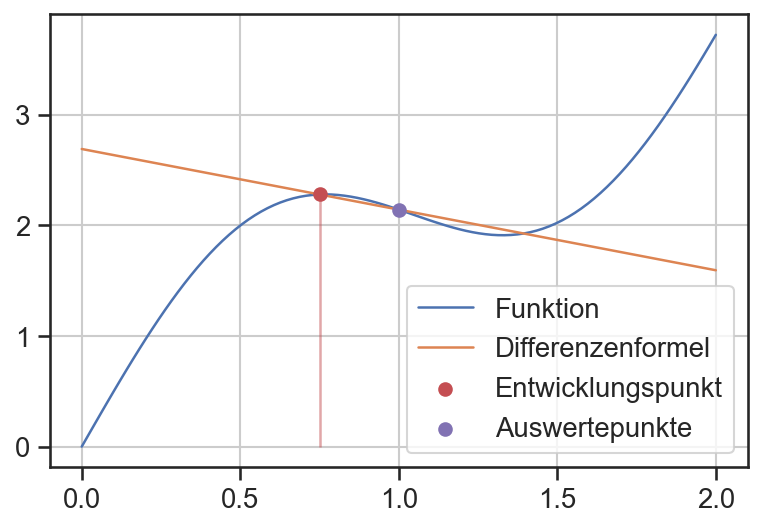

In [26]:
plt.plot(x, y, label="Funktion")
plt.scatter([x0], [f0], color='C3', label='Entwicklungspunkt', zorder=3)
plt.scatter([x0+h], [fh], color='C4', label='Auswertepunkte', zorder=3)

plt.vlines(x0, ymin=0, ymax=f0, color='C3', alpha=0.5)

plt.plot(x, f0 + fp*(x-x0), label='Differenzenformel')

plt.grid()
plt.legend();

Die Ordnung des Verfahrens kann durch die Betrachtung des Fehlers, hier zum bekannten exakten Wert, bestimmt werden. Dazu wird die Schrittweite kontinuierlich verkleinert. 

In [39]:
hs = []
fps = []

h0 = 1
for i in range(20):
    h = h0 / 2**i

    f0 = fkt(x0)
    fh = fkt(x0 + h)

    fp = (fh - f0) / h
    
    hs.append(h)
    fps.append(fp)

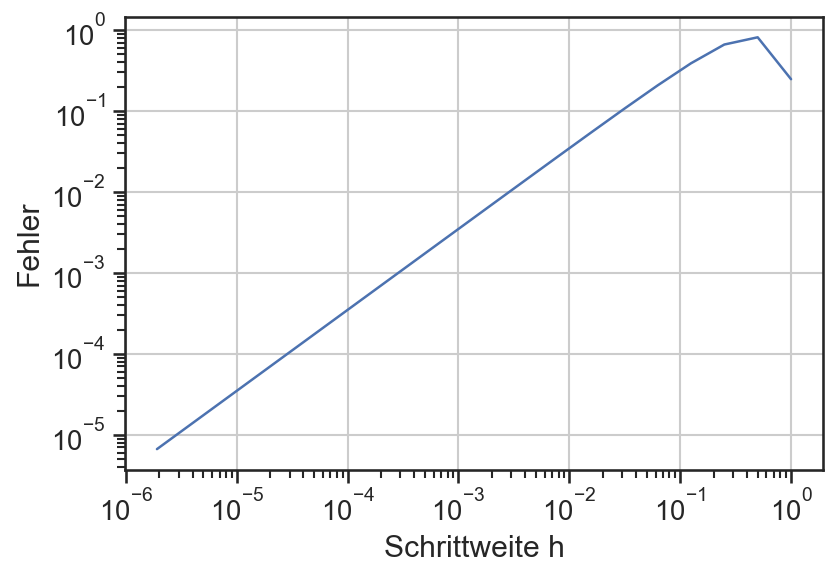

In [40]:
plt.plot(hs, np.abs(fps - fp_exakt))

plt.xlabel('Schrittweite h')
plt.ylabel('Fehler')

plt.xscale('log')
plt.yscale('log')

plt.grid();

In der logiarithmischen Darstellung beider Achsen werden Potenzfunktionen zu Graden mit dem Potenzgrad als Steigung. Das bedeutet, dass der Fehler im obigen Plot sich wie eine Potenzfunktion mit dem Grad eins verhält. Dies entspricht auch der Ordnung $\sf \mathcal{O}(h)$ aus der Differenzenformel.

Mit dem gleichen Ansatz kann auch eine Differenzformel zweiter Ordnung gefunden werden. Dazu wird die Funktion an den Stellen $\sf x_0-h$ und $\sf x_0+h$ mit der Taylor-Reihe bis zur Ordnung $\sf \mathcal{O}(h^3)$ approximiert.

$$\sf f(x_0+h) = f(x_0) + f'(x_0)\cdot h + \frac{1}{2}f''(x_0)\cdot h^2 + \mathcal{O}(h^3) $$
$$\sf f(x_0-h) = f(x_0) - f'(x_0)\cdot h + \frac{1}{2}f''(x_0)\cdot h^2 + \mathcal{O}(h^3) $$

Die Differenz dieser beiden Gleichungen führt zu

$$\sf f(x_0+h) - f(x_0-h) = 2f'(x_0)\cdot h + \mathcal{O}(h^3) $$

Und die Umformung nach der gesuchten Ableitung an der Stelle $\sf x_0$ ergibt

$$\sf f'(x_0) = \frac{f(x_0+h) - f(x_0-h)}{2h} + \mathcal{O}(h^2) $$

Dies ist die zentralle Differenzenformel für die erste Ableitung zweiter Ordnung. Wie bei der vorwärtsgerichteten Formel muss hier die Funktion an zwei Stellen ausgewertet werden, jedoch nicht mehr am Entwicklungspunkt selbst. Durch diese Symmetrie bzgl. des Entwicklungspunkts ergibt sich ein besseres, hier quadratisches, Konvergenzverhalten.

In [45]:
# Entwicklungspunkt und Schrittweite
h = 0.25
x0 = 0.75

# Auswertung an den beiden Stellen
fnh = fkt(x0 - h)
fph = fkt(x0 + h)

# Bestimmung der Ableitungsnäherung
fp = (fph - fnh) / (2*h)

In [46]:
print(f"Die numerische Näherung der Ableitung an der Stelle {x0:.2f} und Schrittweite {h:.2f} ist {fp:.2f}.")
print(f"Der exakte Wert lautet {fp_exakt:.2f}.")

Die numerische Näherung der Ableitung an der Stelle 0.75 und Schrittweite 0.25 ist 0.29.
Der exakte Wert lautet 0.12.


Die Methode kann auch graphisch dargestellt werden. Die gesuchte Steigung ist die Steigung der eingezeichneten Geraden.

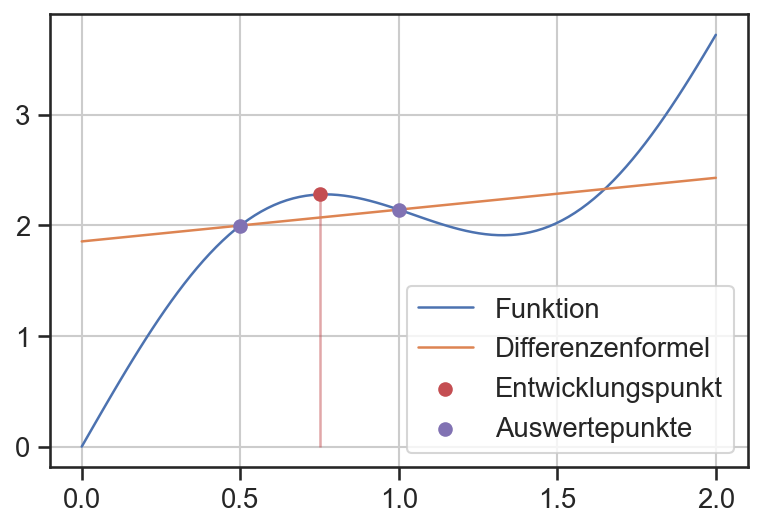

In [48]:
plt.plot(x, y, label="Funktion")
plt.scatter([x0], [f0], color='C3', label='Entwicklungspunkt', zorder=3)
plt.scatter([x0-h, x0+h], [fnh, fph], color='C4', label='Auswertepunkte', zorder=3)

plt.vlines(x0, ymin=0, ymax=f0, color='C3', alpha=0.5)

plt.plot(x, fnh + fp*(x-x0+h), label='Differenzenformel')

plt.grid()
plt.legend();

In [50]:
hs = []
fpfs = []
fpcs = []


h0 = 1
for i in range(20):
    h = h0 / 2**i

    f0 = fkt(x0)
    fnh = fkt(x0 - h)
    fph = fkt(x0 + h)

    fpf = (fph - f0) / h
    fpc = (fph - fnh) / (2*h)
    
    hs.append(h)
    fpfs.append(fpf)
    fpcs.append(fpc)

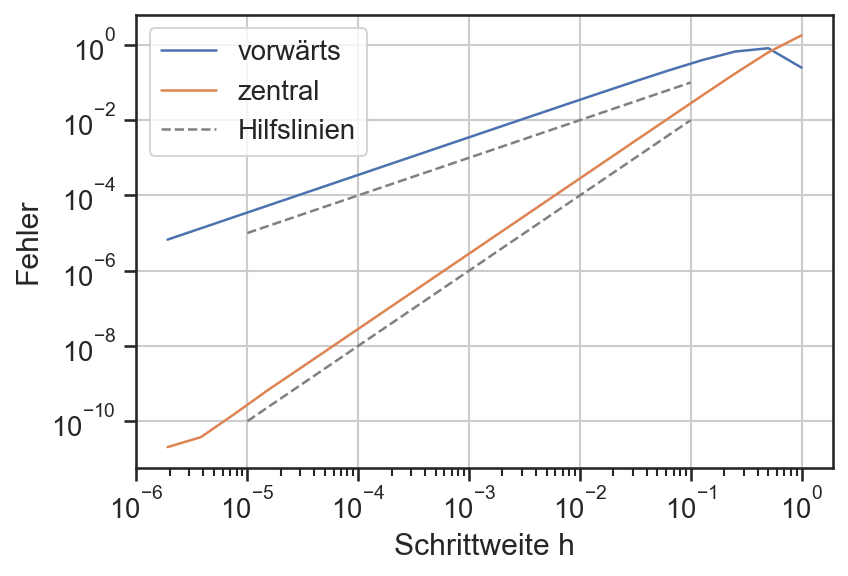

In [55]:
plt.plot(hs, np.abs(fpfs - fp_exakt), label='vorwärts')
plt.plot(hs, np.abs(fpcs - fp_exakt), label='zentral')

plt.plot([1e-5, 1e-1], [1e-5, 1e-1], '--', color='grey', label='Hilfslinien')
plt.plot([1e-5, 1e-1], [1e-10, 1e-2], '--', color='grey')

plt.xlabel('Schrittweite h')
plt.ylabel('Fehler')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid();